In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [8]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [12]:
df.rename({'Annual Income (k$)': 'Income'}, inplace=True, axis=1)
df.rename({'Spending Score (1-100)': 'SpendingScore'}, inplace=True, axis=1)

In [13]:
df.head()

,Gender,Age,Income,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


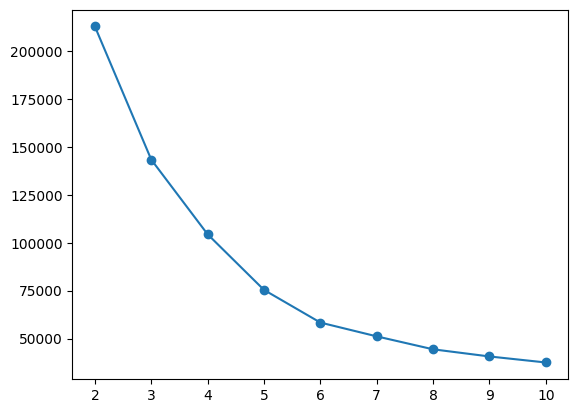

In [15]:
from sklearn.cluster import KMeans

wss = []

for k in range(2, 11):
    
    clusters = KMeans(n_clusters=k)
    clusters.fit(df)
    
    wss.append(clusters.inertia_)
    
number_of_clusters = np.arange(2, 11)

plt.plot(number_of_clusters, wss)
plt.scatter(number_of_clusters, wss)

In [16]:
k = 5

In [17]:
clusters = KMeans(n_clusters=k)

clusters.fit(df)

KMeans(n_clusters=5)

In [18]:
clusters.cluster_centers_

array([[ 0.44      , 24.96      , 28.04      , 77.        ],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.4025974 , 43.72727273, 55.48051948, 49.32467532],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348]])

In [19]:
clusters.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [20]:
len(clusters.labels_)

200

In [21]:
Labels = pd.Series(clusters.labels_)

In [22]:
Labels

0      4
1      0
2      4
3      0
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Length: 200, dtype: int32

In [23]:
df['Labels'] = Labels

In [24]:
df.head()

,Gender,Age,Income,SpendingScore,Labels
0,1,19,15,39,4
1,1,21,15,81,0
2,0,20,16,6,4
3,0,23,16,77,0
4,0,31,17,40,4


In [57]:
df

,Gender,Age,Income,SpendingScore,Labels
0,1,19,15,39,4
1,1,21,15,81,0
2,0,20,16,6,4
3,0,23,16,77,0
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,3
197,1,32,126,74,1
198,1,32,137,18,3


In [25]:
x = df[['Gender', 'Age', 'Income', 'SpendingScore']]
y = df['Labels']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\niran.NIRANJAN_GADE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred = model.predict(x_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.89      1.00      0.94         8
           2       0.94      0.85      0.89        20
           3       0.89      1.00      0.94         8
           4       0.60      0.60      0.60         5

    accuracy                           0.88        50
   macro avg       0.84      0.87      0.85        50
weighted avg       0.88      0.88      0.88        50



In [37]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [38]:
y_pred_xgb = model_xgb.predict(x_test)

In [40]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [41]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
y_pred_dt = model_dt.predict(x_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [44]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=10)
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [46]:
y_pred_rf = model_rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00         8
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5

    accuracy                           0.98        50
   macro avg       0.99      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [47]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred_knn = model_knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00         8
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5

    accuracy                           0.98        50
   macro avg       0.99      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



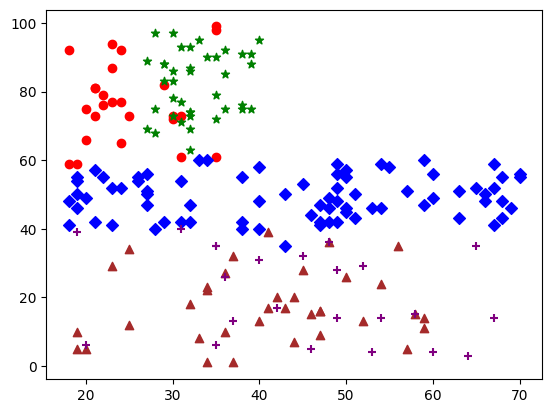

In [52]:
markers = ['o', '*', 'D', '^', '+']
colors = ['red', 'green', 'blue', 'brown', 'purple']
for index in range(k):
    plt.scatter(
        df['Age'][clusters.labels_ == index],
        df['SpendingScore'][clusters.labels_ == index],
        color=colors[index], 
        marker=markers[index])

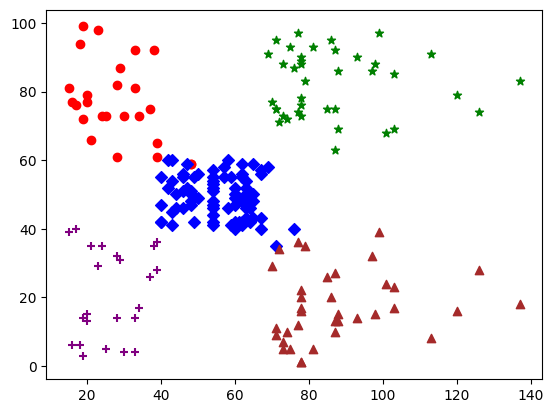

In [53]:
markers = ['o', '*', 'D', '^', '+']
colors = ['red', 'green', 'blue', 'brown', 'purple']
for index in range(k):
    plt.scatter(
        df['Income'][clusters.labels_ == index],
        df['SpendingScore'][clusters.labels_ == index],
        color=colors[index], 
        marker=markers[index])

In [55]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(distance_threshold=0,n_clusters=None)
clustering.fit(df)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [56]:
clustering.labels_

array([195, 132, 103, 197, 189, 159, 117, 135, 153, 129, 199, 173, 177,
       188, 139, 141, 184, 147, 157, 175, 161, 140, 143, 104, 127, 112,
       156, 123, 107, 108, 116, 109, 119, 113, 176, 124, 174, 163, 191,
       165, 100, 111, 110, 167, 121, 183, 144, 131, 196, 155, 181, 185,
       142, 133, 166, 138, 178, 136, 125, 168,  91, 146, 171, 134, 170,
        99, 128, 182, 114,  53,  65, 187, 101,  61, 164,  88,  93, 126,
       115, 172, 118,  57, 137, 190,  87, 198,  81, 186, 179, 160,  77,
        69, 192, 130, 193,  43, 106, 169,  62,  79, 194,  94,  63, 154,
       150, 148,  97,  70,  73,  58, 180, 122,  89,  86,  96, 152,  54,
        92, 149,  56, 102,  74,  64, 162, 145, 120,  55,  85,  28,  98,
        84,  27,  72,  46,  76,  36,  67,  50,  31,  82, 151,  71,  80,
        83,  49,  66,  59,  95,  41,  13,  90,  44,  35,  60, 158,  17,
        45,  75,  29,  68,  39,  51,  47,  42,  30,  21,  48,  40,  22,
        20,  78,  33,  34,  38, 105,  26,  37,  32,  19,  15,  5